🤖 Emotion-Aware Chatbot is ready. Type 'exit' to quit.



You:  hi


🧠 Emotion: neutral (0.90)
Bot: Thanks for sharing. I'm here to listen.



You:  i whant to kill chicken


🧠 Emotion: neutral (0.90)
Bot: It sounds like you're going through something serious. You're not alone—please consider reaching out to someone you trust.



You:  i want to kill chicken for today night dinner


🧠 Emotion: neutral (0.90)
Bot: It sounds like you're going through something serious. You're not alone—please consider reaching out to someone you trust.



You:  exit


Bot: Take care! I'm always here if you need me.


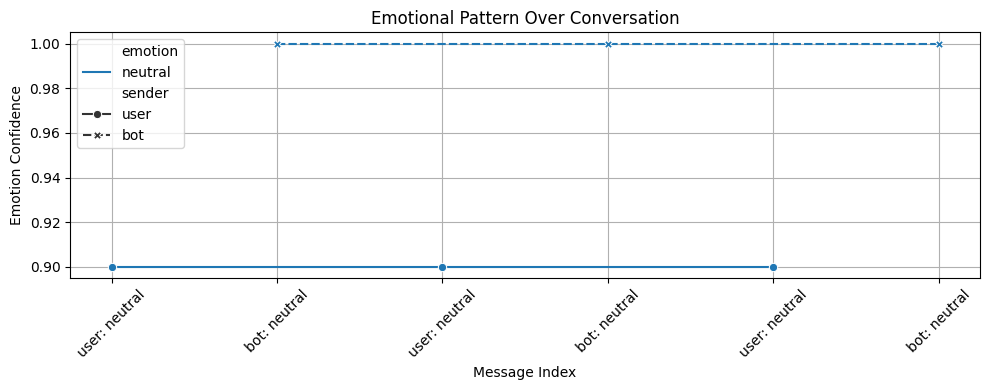


📊 Conversation Summary:
  sender                                               text  emotion  \
0   user                                                 hi  neutral   
1    bot            Thanks for sharing. I'm here to listen.  neutral   
2   user                            i whant to kill chicken  neutral   
3    bot  It sounds like you're going through something ...  neutral   
4   user      i want to kill chicken for today night dinner  neutral   
5    bot  It sounds like you're going through something ...  neutral   

   confidence  
0         0.9  
1         1.0  
2         0.9  
3         1.0  
4         0.9  
5         1.0  

🔁 User Engagement Score: 0.50
✅ Response Effectiveness Samples: [('neutral', 'neutral'), ('neutral', 'neutral')]
🎯 Dominant Tone: neutral
📈 Emotion Averages (last 10): {'neutral': 0.9}


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Dummy emotion classifier for illustration
def emotion_classifier(text):
    # Replace with your actual model logic
    return [{'label': 'neutral', 'score': 0.9}]

# Fallback responses
fallback_responses = {
    "joy": "That's wonderful to hear! What made you feel so happy?",
    "sadness": "I'm really sorry you're feeling this way. Want to talk more about it?",
    "anger": "I hear your frustration. Let's work through it together.",
    "fear": "That sounds scary. I'm here with you — you're safe.",
    "surprise": "Wow, that’s unexpected! Tell me more.",
    "neutral": "Thanks for sharing. I'm here to listen."
}

def generate_bot_response(emotion, user_input):
    return fallback_responses.get(emotion, "I'm here for you. Let's talk.")

def analyze_emotion(text):
    result = emotion_classifier(text)[0]
    return result['label'], result['score']

def is_crisis(emotion, score, text):
    # Placeholder logic for crisis detection
    return "kill" in text.lower() and score > 0.6

# ✅ Fixed EmotionTracker class
class EmotionTracker:
    def __init__(self):
        self.window = []

    def update(self, emotion_scores):
        self.window.append(emotion_scores)
        if len(self.window) > 10:
            self.window.pop(0)

    def average(self):
        if not self.window:
            return {}
        all_keys = set().union(*self.window)
        return {
            k: sum(d.get(k, 0) for d in self.window) / len(self.window)
            for k in all_keys
        }

# Initialize
conversation_log = []
tracker = EmotionTracker()

print("🤖 Emotion-Aware Chatbot is ready. Type 'exit' to quit.\n")

# Runtime loop
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Bot: Take care! I'm always here if you need me.")
        break

    emotion, score = analyze_emotion(user_input)
    timestamp = datetime.now()

    # Crisis check
    if is_crisis(emotion, score, user_input):
        bot_reply = "It sounds like you're going through something serious. You're not alone—please consider reaching out to someone you trust."
    else:
        bot_reply = generate_bot_response(emotion, user_input)

    # Log messages
    conversation_log.append({
        "timestamp": timestamp,
        "sender": "user",
        "text": user_input,
        "emotion": emotion,
        "confidence": round(score, 3)
    })

    conversation_log.append({
        "timestamp": datetime.now(),
        "sender": "bot",
        "text": bot_reply,
        "emotion": "neutral",
        "confidence": 1.0
    })

    tracker.update({emotion: score})

    print(f"🧠 Emotion: {emotion} ({score:.2f})")
    print(f"Bot: {bot_reply}\n")

# Summary and Visualization
df = pd.DataFrame(conversation_log)
user_msgs = df[df['sender'] == 'user']
engagement_score = len(user_msgs) / len(df)

effectiveness = []
for i in range(1, len(df) - 1):
    if df.iloc[i]['sender'] == 'bot' and df.iloc[i + 1]['sender'] == 'user':
        before = df.iloc[i - 1]['emotion']
        after = df.iloc[i + 1]['emotion']
        effectiveness.append((before, after))

tone_summary = user_msgs['emotion'].value_counts().to_dict()
dominant_tone = max(tone_summary, key=tone_summary.get)

# Plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x=df.index, y="confidence", hue="emotion", style="sender", markers=True)
plt.title("Emotional Pattern Over Conversation")
plt.xlabel("Message Index")
plt.ylabel("Emotion Confidence")
plt.xticks(df.index, df['sender'] + ": " + df['emotion'], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Final Summary
print("\n📊 Conversation Summary:")
print(df[['sender', 'text', 'emotion', 'confidence']])
print(f"\n🔁 User Engagement Score: {engagement_score:.2f}")
print(f"✅ Response Effectiveness Samples: {effectiveness}")
print(f"🎯 Dominant Tone: {dominant_tone}")
print(f"📈 Emotion Averages (last 10): {tracker.average()}")
